# Чуть-чуть математики

Теперь давайте попробуем написать функцию. Например, чтобы приближённо считала синус. Для небольших $x$:

$$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots + R(x) =
\sum_{n=0}^N (-1)^n \frac{x^{2n+1}}{(2n+1)!} + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [46]:
import math

iterations = 20

def my_sin(x):
    """Вычисление синуса при помощи частичного суммирования ряда Тейлора"""
    x_pow = x
    multiplier = 1
    partial_sum = x
    for n in range(1, iterations):
        x_pow *= x**2  # В цикле постепенно считаем степень
        multiplier *= -1 / (2*n) / (2*n + 1)  # (-1)^n и факториал
        partial_sum += x_pow * multiplier
    
    return partial_sum

print(my_sin.__doc__, my_sin(0.4))
print(math.sin.__doc__, math.sin(0.4))

Вычисление синуса при помощи частичного суммирования ряда Тейлора 0.38941834230865047
Return the sine of x (measured in radians). 0.3894183423086505


выходит у нас немного неточно, но зато...

... Зато наша функция умеет считать синус комплексного аргумента, легко достигающий пяти и более в мирное время. Мнимая единица ($i$) в Питоне обозначется, как `j`.

Стандартная библиотека тоже умеет, **и поточнее**.

In [42]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

complex_angle = cmath.asin(5)
print('"Угол", на котором синус достигает пяти:', complex_angle)

print("Достигает ли пяти наш синус?", my_sin(complex_angle))
print("А библиотечный?", cmath.sin(complex_angle))

"Угол", на котором синус достигает пяти: (1.5707963267948966+2.2924316695611777j)
Достигает ли пяти наш синус? (5+5.887003747693252e-16j)
А библиотечный? (5+2.999759773043693e-16j)


А какое и где слабое место у нашего синуса?

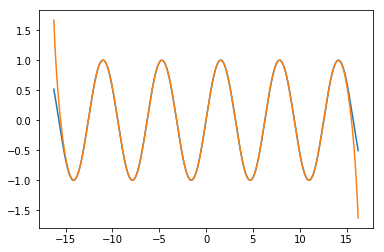

In [43]:
%matplotlib inline

angles = np.r_[-16.25:16.25:0.01]
plt.plot(angles, np.sin(angles))
plt.plot(angles, np.vectorize(my_sin)(angles))
plt.show()

# Задание

Реализовать вычисление частичной суммы [ряда Тейлора для одной из элементарных функций](http://ru.math.wikia.com/wiki/%D0%A0%D1%8F%D0%B4_%D0%A2%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0) (кроме синуса 😸), аналогичным образом «испытать» получившиеся функции. 